## A very basic introduction to k-means clustering

In [17]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

Let's use the Iris data to explore k-means clustering.

In [2]:
iris = load_iris()

In [19]:
X = iris.data[:, :2]
y = iris.target

Let's plot the two features against eachother for each of the three target groups.

Text(0,0.5,'Sepal Width')

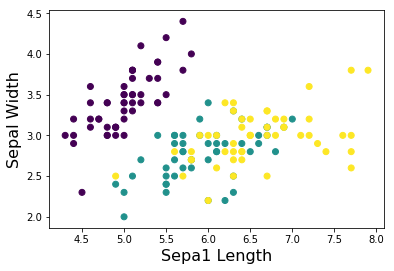

In [21]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.xlabel('Sepa1 Length', fontsize=16)
plt.ylabel('Sepal Width', fontsize=16)

Now, let's instantiate and fit a k-means model with k=3.

In [37]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=50)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

The final centroid locations are:

In [38]:
centers = km.cluster_centers_
print(centers)

[[6.81276596 3.07446809]
 [5.77358491 2.69245283]
 [5.006      3.418     ]]


In [39]:
new_labels = km.labels_

We can check the model-generated labels by plotting the features again with the new labels.

Text(0,0.5,'Sepal Width')

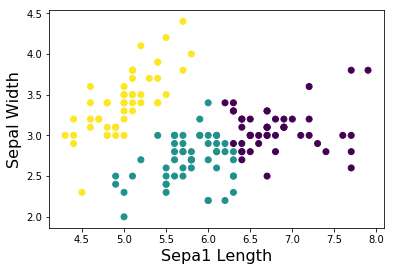

In [42]:
plt.scatter(X[:,0], X[:,1], c=new_labels, cmap='viridis')
plt.xlabel('Sepa1 Length', fontsize=16)
plt.ylabel('Sepal Width', fontsize=16)

Construct an "elbow plot" to confirm that we used the correct number of clusters.

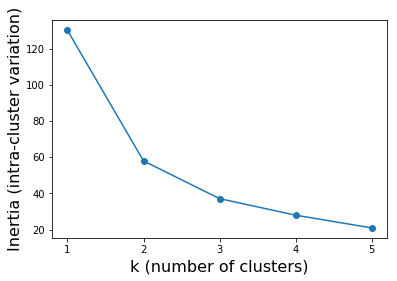

In [16]:
kList = range(1, 6)
inertias = []

for k in kList:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)
    
plt.plot(kList, inertias, '-o')
plt.xlabel('k (number of clusters)', fontsize=16)
plt.ylabel('Inertia (intra-cluster variation)', fontsize=16)
plt.xticks(kList)
plt.show()